In [40]:
from typing import List
from math import exp,  pi
import numpy as np
import matplotlib.pyplot as plt
import time

In [41]:
## Problem 3
## Choose dimension to be 2

## pdf of the unmornalized distribution
def pdf(x:List):
    res = -x[0]**4-x[1]**4 - x[0] ** 2 * x[1]**2
    return exp(res)

def d_pdf(x:List) -> List:
    return np.array([-4* x[0]**3 - 2*x[0]*x[1]**2, -4*x[1]**3 -2 * x[1]*x[0]**2])

## gaussian propasal distribution 
def q(x1,x2):
    return 1 / (2*pi) * exp(-1/2 *( (x1[0]-x2[0])**2 + (x1[1]-x2[1])**2 ))


In [42]:
## Metropolis_hasing algorithm

samples = []

## Initialize x_0
x_0 = np.random.randn(2)
samples.append(x_0)

## for loop
N = 10000
t = time.time()
for i in range(0,N):
    # sample u
    u = np.random.rand()
    # sample x
    x_star = np.random.normal(samples[i])
    A = min(1, pdf(x_star)/pdf(samples[i]))
    if (u<A):
        samples.append(x_star)
    else:
        samples.append(samples[i])
print(f"time used: {time.time() - t}")

time used: 0.14467787742614746


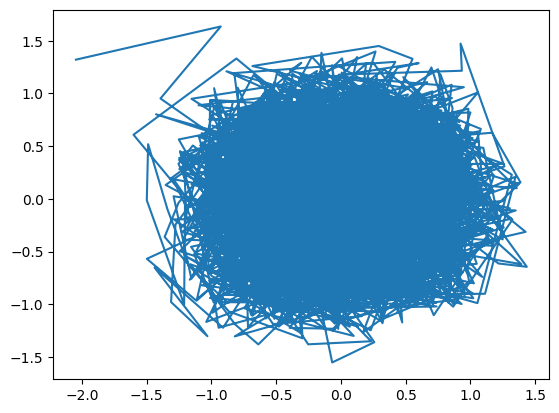

In [43]:
x = [i[0] for i in samples]
y = [i[1] for i in samples]
plt.plot(x,y)

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [  0.,   0.,   1.,   7.,   2.,   7.,  13.,  11.,   0.,   0.],
        [  1.,  13.,  39.,  38.,  86.,  52.,  59.,  11.,   0.,   0.],
        [  1.,  44., 102., 217., 214., 211., 178.,  85.,  21.,   6.],
        [  6.,  66., 201., 280., 382., 360., 275., 201.,  35.,   0.],
        [ 10.,  92., 244., 391., 305., 411., 353., 231.,  75.,   6.],
        [ 10.,  97., 247., 300., 415., 346., 312., 191.,  53.,   4.],
        [  0.,  55., 217., 323., 356., 281., 274., 169.,  30.,   2.],
        [  0.,  13.,  77., 167., 147., 236., 139.,  77.,  16.,   1.],
        [  0.,   0.,  11.,  28.,  32.,  26.,   5.,   0.,   0.,   0.]]),
 array([-2.04617548, -1.69799224, -1.349809  , -1.00162576, -0.65344252,
        -0.30525928,  0.04292396,  0.3911072 ,  0.73929045,  1.08747369,
         1.43565693]),
 array([-1.55147718, -1.2328433 , -0.91420941, -0.59557553, -0.27694164,
         0.04169224,  0.36032612,  0.67896001,  0.997593

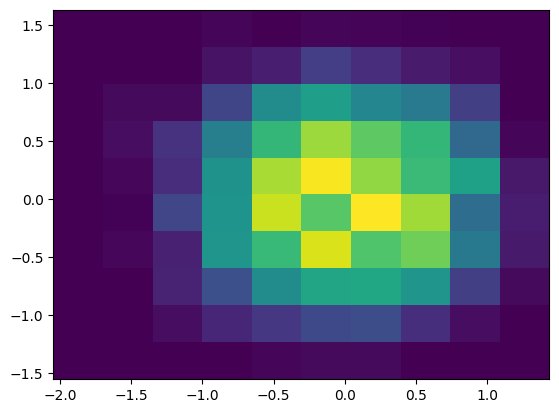

In [44]:
plt.hist2d(x,y)

In [45]:
eps = 1

def q(y,x):
    return exp(-np.linalg.norm((y-x-eps/2*d_pdf(x))/(2*eps) )**2)

In [48]:
## MALA

## Metropolis_hasing algorithm

samples = []

## Initialize x_0
x_0 = np.random.randn(2)
samples.append(x_0)

## for loop
N = 10000
t = time.time()
for i in range(0,N):
    # sample u
    u = np.random.rand()
    # sample x
    noise = np.random.normal([0,0], eps)
    x_star = samples[i] + eps/2*d_pdf(samples[i]) + noise
    A = min(1, pdf(x_star)/pdf(samples[i]) * q(samples[i],x_star) / q(x_star,samples[i]))
    if (u<A):
        samples.append(x_star)
    else:
        samples.append(samples[i])
print(f"time used: {time.time() - t}")

time used: 0.43813157081604004


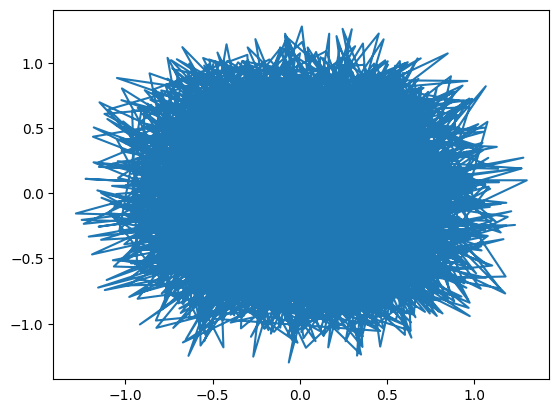

In [49]:
x = [i[0] for i in samples]
y = [i[1] for i in samples]
plt.plot(x,y)

(array([[  0.,   0.,  41.,  81., 158.,  70.,  34., 113.,  20.,   0.],
        [  0.,  24.,  66.,  73., 103.,  77.,  74.,  68.,  38.,   0.],
        [103.,  55., 105., 135., 165., 158., 126.,  79.,  78.,  29.],
        [ 47.,  63., 152., 225., 254., 217., 182., 143., 156.,  26.],
        [102., 100., 191., 211., 269., 274., 184., 216., 117.,  49.],
        [ 48., 106., 166., 191., 231., 206., 180., 138.,  94., 102.],
        [ 60., 105., 140., 235., 163., 229., 211., 148., 113.,  27.],
        [ 29.,  70., 119., 129., 154., 155., 146., 117.,  54.,   9.],
        [  0.,  50.,  63.,  74., 103.,  88.,  66.,  48.,  15.,  10.],
        [  0.,   0.,  35.,  32.,  74.,  82., 121.,   4.,  10.,   0.]]),
 array([-1.28369227, -1.02531322, -0.76693417, -0.50855513, -0.25017608,
         0.00820297,  0.26658201,  0.52496106,  0.7833401 ,  1.04171915,
         1.3000982 ]),
 array([-1.29688796, -1.03940098, -0.781914  , -0.52442702, -0.26694003,
        -0.00945305,  0.24803393,  0.50552091,  0.763007

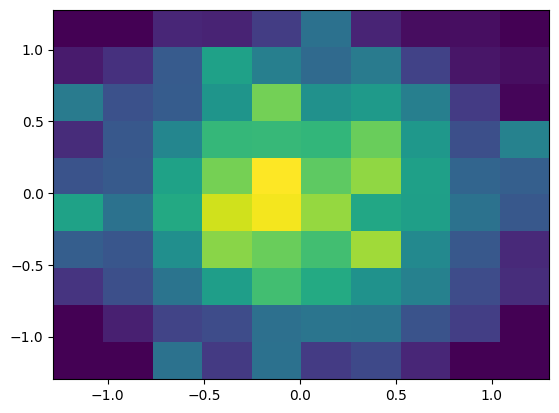

In [50]:
plt.hist2d(x,y)